<a href="https://colab.research.google.com/github/p73rl11zq/CV_base/blob/main/IU_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import math

s1 = 92    # coefficient of proportionality
matplotlib.rcParams['figure.figsize'] = ((1280/s1, 720/s1))

# Basic functions

Hystogram plotters:

In [ ]:
def hystogram(image, size, name, flag):

    plt.figure(figsize=(size))

    plt.hist(image.ravel(), 256, [0,255])

    plt.show();
    
    if flag=='save':
        
        plt.savefig('histograms/' + name + '.jpg')
        
    else:
        
        flag=flag
        

def hystogram_twins(image1, image2, size, name1, name2, flag):
    
    fig, axes = plt.subplots(nrows = 2, ncols = 1)

    axes[0].hist(image1.ravel(), 256, [0,255])
    axes[1].hist(image2.ravel(), 256, [0,255])

    plt.figure(figsize=(size))
    
    axes[0].set(title = name1)
    axes[1].set(title = name2)

    plt.show();
    
    if flag=='save':
        
        plt.savefig('histograms/' + name1 + '_&_' + name2 + '.jpg')
        
    else:
        
        flag=flag

Image displaying function:

In [ ]:
def view(image, name_of_window):

    cv2.namedWindow(name_of_window, cv2.WINDOW_NORMAL)

    cv2.imshow(name_of_window, image)
   
    cv2.waitKey(0)
    
    cv2.destroyAllWindows()
    

def view2(image1, name_of_window1, image2, name_of_window2):

    cv2.namedWindow(name_of_window1, cv2.WINDOW_NORMAL)
    
    cv2.namedWindow(name_of_window2, cv2.WINDOW_NORMAL)
    
    cv2.imshow(name_of_window1, image1)
    
    cv2.imshow(name_of_window2, image2)
   
    cv2.waitKey(0)
    
    cv2.destroyAllWindows()

# Gamma correction

In [ ]:
def gamma_correction(image, gamma, image_name, corrected_name, flag):

    g_image = image.copy()

    max_pt = np.max(g_image)

    g_image = (((g_image / max_pt) ** gamma)*255).astype("uint8")
         
    if flag=='save':
        
        cv2.imwrite('Processed images/' + corrected_name + '.jpg', g_image)
        
    else:
        
        flag=flag

    view2(image, image_name, g_image, corrected_name)
    
    return g_image;

Processing of morning-image:

In [ ]:
morning = cv2.imread('raw/kit3/morning.jpg')

In [ ]:
morning

array([[[164, 158, 159],
        [166, 160, 161],
        [167, 161, 162],
        ...,
        [ 33,  64,  73],
        [ 34,  65,  74],
        [ 33,  66,  75]],

       [[165, 159, 160],
        [167, 161, 162],
        [171, 163, 164],
        ...,
        [ 36,  67,  76],
        [ 36,  67,  76],
        [ 37,  68,  77]],

       [[166, 160, 161],
        [170, 162, 163],
        [172, 164, 165],
        ...,
        [ 40,  69,  78],
        [ 38,  69,  78],
        [ 38,  69,  78]],

       ...,

       [[244, 238, 239],
        [245, 239, 240],
        [243, 237, 238],
        ...,
        [ 66,  90, 110],
        [ 66,  90, 110],
        [ 66,  90, 110]],

       [[246, 240, 245],
        [247, 240, 245],
        [241, 234, 239],
        ...,
        [ 69,  91, 109],
        [ 69,  91, 109],
        [ 69,  91, 109]],

       [[251, 244, 251],
        [246, 238, 245],
        [239, 231, 238],
        ...,
        [ 69,  91, 109],
        [ 71,  91, 109],
        [ 71,  91, 108]]

In [ ]:
morning_gamma = gamma_correction(morning, 1.8, 'morning', 'gamma_morning', 's')

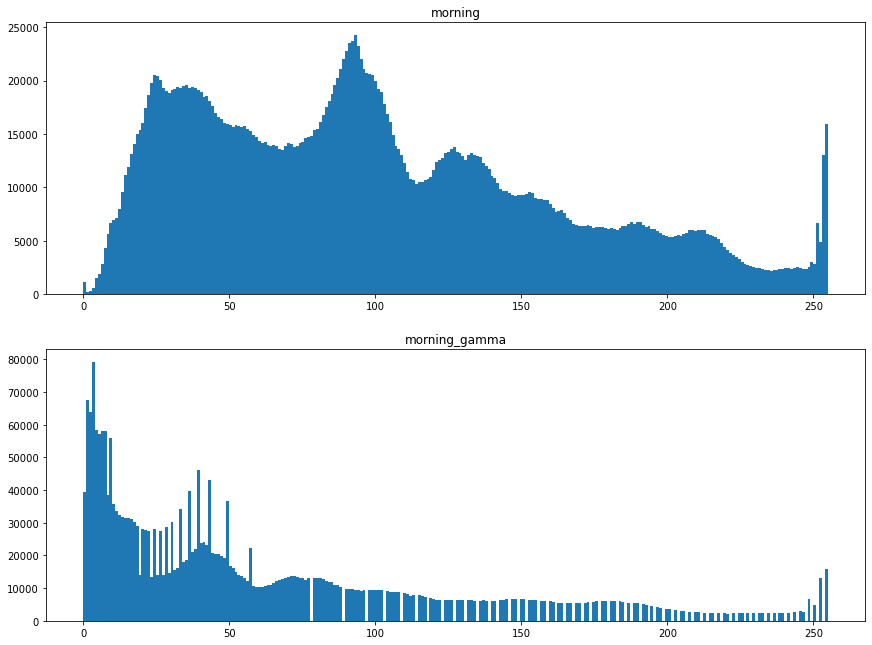

<Figure size 720x360 with 0 Axes>

<Figure size 1056.88x792.661 with 0 Axes>

In [ ]:
hystogram_twins(morning, morning_gamma, [10,5], 'morning', 'morning_gamma', 's')

Processing of day-image:

In [ ]:
day = cv2.imread('raw/kit3/day.jpg')

In [ ]:
day_gamma = gamma_correction(day, 2.0, 'day', 'gamma_day', 'save')

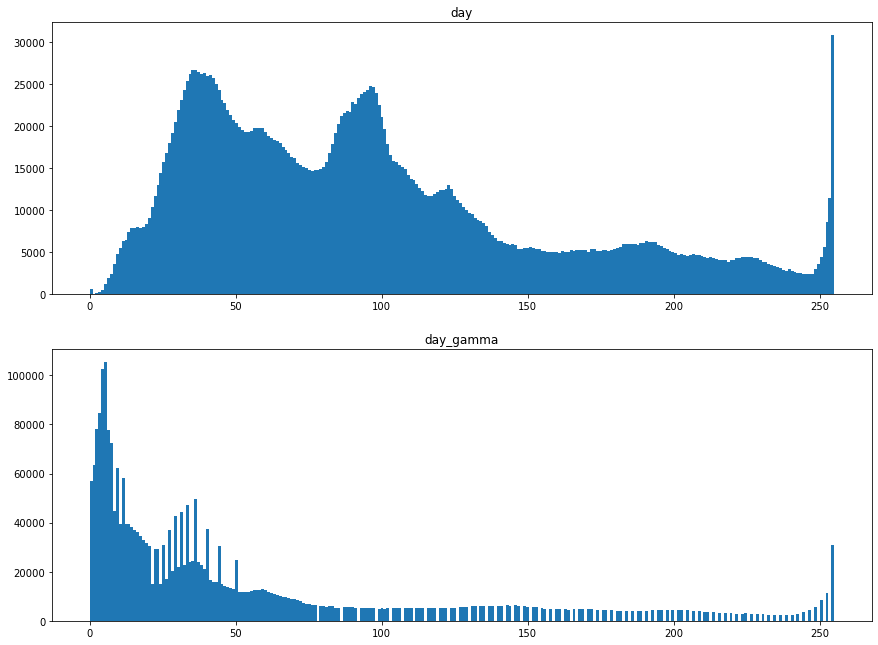

<Figure size 720x360 with 0 Axes>

<Figure size 1056.88x792.661 with 0 Axes>

In [ ]:
hystogram_twins(day, day_gamma, [10,5], 'day', 'day_gamma', 'save')

Processing of l-even-image:

In [ ]:
evening_lamp = cv2.imread('raw/kit1/relevant/evening_lamp.jpg')

In [ ]:
evening_lamp_gamma = gamma_correction(evening_lamp, 1.5, 'lamp', 'gamma_lamp', 'save')

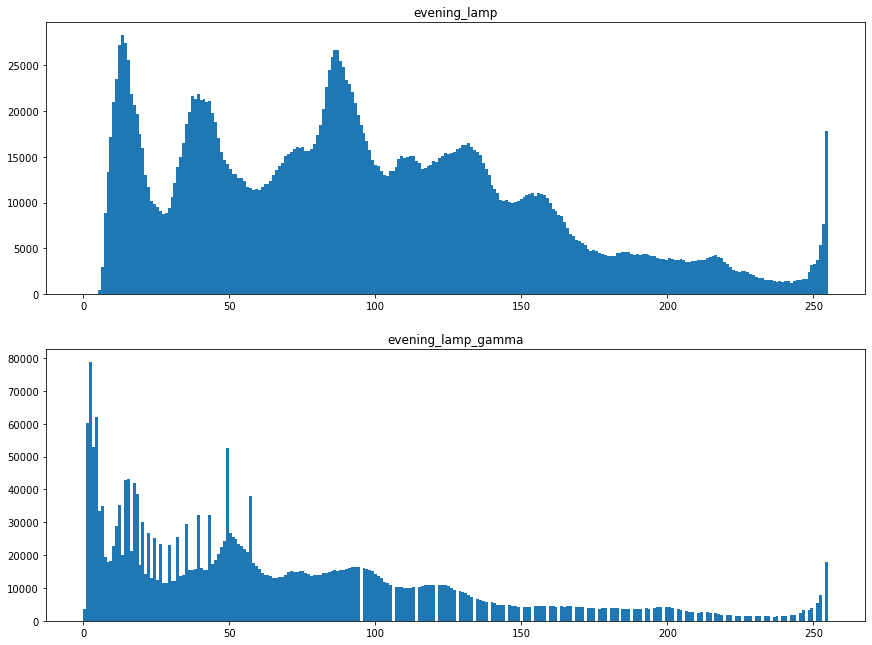

<Figure size 720x360 with 0 Axes>

<Figure size 1056.88x792.661 with 0 Axes>

In [ ]:
hystogram_twins(evening_lamp, evening_lamp_gamma, [10,5], 'evening_lamp', 'evening_lamp_gamma', 'save')

Processing of d-even-image:

In [ ]:
evening_dark = cv2.imread('raw/kit1/relevant/evening_dark.jpg')

In [ ]:
evening_dark_gamma = gamma_correction(evening_dark, 0.6, 'dark', 'gamma_dark', 'save')

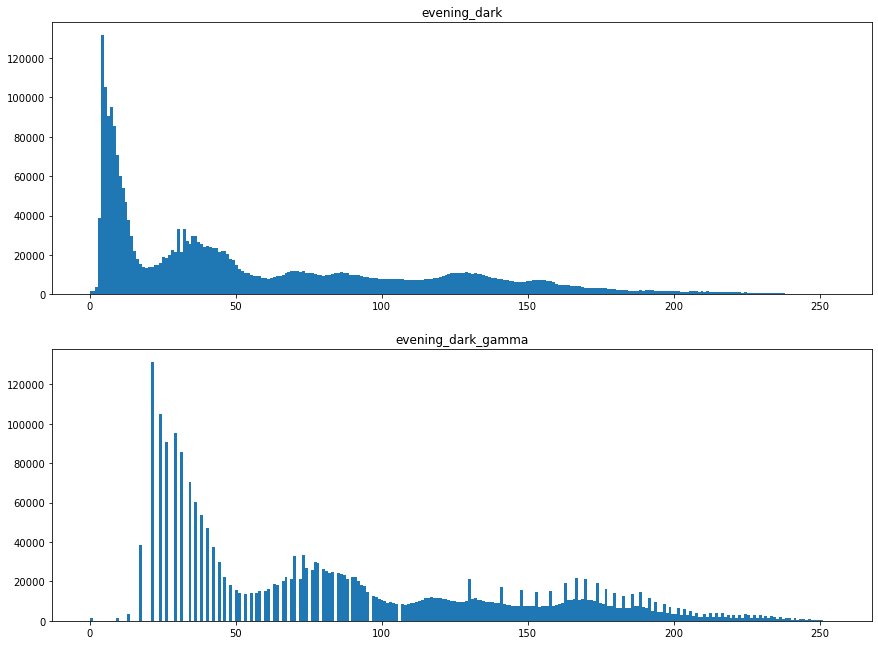

<Figure size 720x360 with 0 Axes>

<Figure size 1056.88x792.661 with 0 Axes>

In [ ]:
hystogram_twins(evening_dark, evening_dark_gamma, [10,5], 'evening_dark', 'evening_dark_gamma', 'save')

# Filtration

RGB-filter:

In [ ]:
image = cv2.imread('Processed images/gamma_morning.jpg')

In [ ]:
def filtration_rgb(image, kernel_size):
    
    b, g, r = image[:,:,0], image[:,:,1], image[:,:,2] 
    
    n = kernel_size
    
    kernel = np.ones((n,n))
    
    gikai_b = np.zeros((b.shape[0] + n - 1, b.shape[1] + n - 1))
    gikai_g = np.zeros((g.shape[0] + n - 1, g.shape[1] + n - 1))
    gikai_r = np.zeros((r.shape[0] + n - 1, r.shape[1] + n - 1))
    
    gikai_b[n//2:gikai_b.shape[0]-n//2, n//2:gikai_b.shape[1]-n//2] = b
    gikai_g[n//2:gikai_g.shape[0]-n//2, n//2:gikai_g.shape[1]-n//2] = g 
    gikai_r[n//2:gikai_r.shape[0]-n//2, n//2:gikai_r.shape[1]-n//2] = r 
    
    temp = [gikai_b, gikai_g, gikai_r]
    
    target_b = np.zeros(b.shape) #area of filling the result of filtering 
    target_g = np.zeros(g.shape)
    target_r = np.zeros(r.shape)
    
    targets = [target_b, target_g, target_r]
    
    for i in range(n//2, gikai_b.shape[0]-n//2):
        
        for j in range(n//2, gikai_b.shape[1]-n//2):
            
            for s in range(len(temp)):
            
                curr = temp[s] 
                
                sliding_area = curr[i-n//2:i+n//2+1, j-n//2:j+n//2+1] 
            
                result = (sliding_area * kernel).ravel()
                
                result = np.sum(result)//(kernel_size**2)
            
                #result = np.sort(result)
                
                tar = targets[s]
            
                #tar[i-n//2, j-n//2] = result[int((result.shape[0] - 1)/2)]
                
                tar[i-n//2, j-n//2] = result.astype("uint8")
            
    target = cv2.merge((target_b, target_g, target_r))
            
    return target

In [ ]:
sas = filtration_rgb(image, 7)

view2(image, 'orig', sas/255, 'sas')

In [ ]:
cv2.imwrite('Processed images/sas.jpg', sas)

True

In [ ]:
view(sas/255, 'sas')

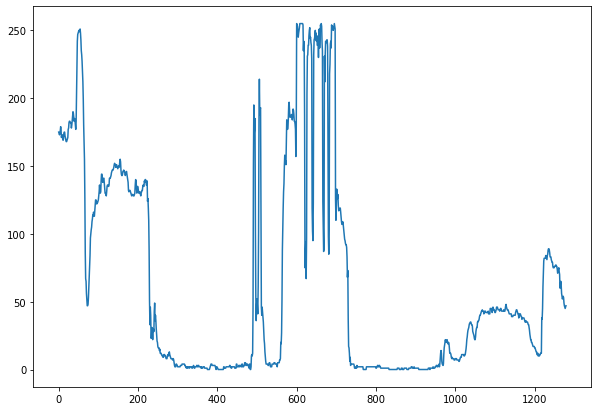

In [ ]:
img_br = noise_detector(sas)

# Binarization

In [ ]:
sas = cv2.imread('Processed images/sas.jpg')

view(sas, 'sas')

In [ ]:
def binarization(img, k_g, k_b, border, flag):
    
    img_bin = np.copy(img)
    
    b, g, r = img_bin[:,:,0], img_bin[:,:,1], img_bin[:,:,2] 
    
    for i in range(img_bin.shape[0]):  
        
        for j in range(img_bin.shape[1]):    
            
            if g[i][j]==0 or b[i][j]==0:
                
                img_bin[i][j] = 0
            
            elif (r[i][j] > border) and (r[i][j] /g[i][j] > k_g) and (r[i][j] /b[i][j] > k_b):
                
                img_bin[i][j] = 255
                
            else:
                
                img_bin[i][j] = 0
    
    if flag=='save':
        
        cv2.imwrite('Processed images/binarized_obj/' + '%.2f_%.2f_%d'%(k_g, k_b, border) + '.jpg', img_bin)
        
    else:
        
        pass
            
    return img_bin

In [ ]:
# Successed samples:
# 2.3, 1.6, 70 (img = 'raw/kit3/morning.jpg')
# 2.1, 1.3, 85 (img = 'raw/kit3/morning.jpg')
# 2.1, 1.5, 85 (img = 'raw/kit3/morning.jpg')
# 1.9, 1.1, 85 (img = 'raw/kit3/morning.jpg')

In [ ]:
k_g, k_b, border = 2.0, 1.3, 70

binarized1 = binarization(sas, k_g, k_b, border, 'unsave')   

view(binarized1, 'binarized1')

# Postprocessing

B&W filter:

In [ ]:
def filtration_bw(image, kernel_size, flag):
    
    n = kernel_size
    
    kernel = np.ones((n,n))    #dtype=np.int8
    
    gikai = np.zeros((image.shape[0] + n - 1, image.shape[1] + n - 1)) #is used as intermediate image
    
    gikai[n//2:gikai.shape[0]-n//2, n//2:gikai.shape[1]-n//2] = image
    
    target = np.zeros(image.shape) #area of filling the result of filtering 
    
    for i in range(n//2, gikai.shape[0]-n//2):
        
        for j in range(n//2, gikai.shape[1]-n//2):
                
            sliding_area = gikai[i-n//2:i+n//2+1, j-n//2:j+n//2+1] 
            
            result = (sliding_area * kernel).ravel().astype("uint8")
            
            if flag=='median':
            
                result = np.sort(result)
                
                target[i-n//2, j-n//2] = result[int((result.shape[0] - 1)/2)]/255
                
            elif flag=='middle':
            
                result = np.sum(result)//(kernel_size**2)
            
                target[i-n//2, j-n//2] = result.astype("uint8")
            
    return target

In [ ]:
img = cv2.imread('Processed images/binarized_obj/2.00_1.30_70.jpg', 0)

In [ ]:
fbw = filtration_bw(img, 7, 'median')
view2(img, 'binarized1', fbw, 'fbw')

Morphological:

In [ ]:
def morph_op(img, kernel, flag):
    
    img_morph = np.zeros((img.shape[0], img.shape[1]))
    
    m, n = kernel.shape
    
    gikai = np.zeros((img.shape[0]+m-1, img.shape[1]+n-1))
    
    gikai[m//2:gikai.shape[0]-m//2, n//2:gikai.shape[1]-n//2] = img
    
    for i in range(m//2, gikai.shape[0]-m//2):
        
        for j in range(n//2, gikai.shape[1]-n//2):
            
            temporary = gikai[i-m//2:i+m//2+1, j-n//2:j+n//2+1]
            
            if flag == 'dilatation':
                
                img_morph[i-m//2, j-n//2] = temporary.max()
                
            elif flag == 'erosion':
                
                img_morph[i-m//2, j-n//2] = temporary.min() 
                
    return img_morph

In [ ]:
kernel = np.ones((7,7))

img_fill = morph_op(fbw, kernel, 'dilatation')

img_eros= morph_op(img_fill, kernel, 'erosion')

In [ ]:
view2(fbw, '1', img_eros, '2')

Filling internal area:

In [ ]:
bebra = filtration_bw(img_eros, 3, 'middle')

In [ ]:
view2(img_eros, '1', bebra, '2')

In [ ]:
kernel1 = np.ones((69,69))

img_fill2 = morph_op(bebra, kernel1, 'dilatation')

img_eros2= morph_op(img_fill2, kernel2, 'erosion')

In [ ]:
view2(img_eros, '1', img_eros2, '2')

# Contouring

Sobelka:

In [ ]:
def sobel_contouring(image):

    sobel_1 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])  # / 4

    sobel_2 = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])  # / 4

    sob_image = np.zeros(image.shape)

    for i in range(1, sob_image.shape[0]-1):
    
        for j in range(1, sob_image.shape[1]-1):
        
            sob_image[i, j] = (np.abs(np.sum(image[i-1:i+2, j-1:j+2] * sobel_1)) + np.abs(np.sum(image[i-1:i+2, j-1:j+2] * sobel_2))) / 2
            
    view2(image, 'binarized', sob_image, 'contered')
            
    return sob_image;

In [ ]:
cont = sobel_contouring(img_eros2)

In [ ]:
view2(binarized1, 'binarized', cont, 'contored')